# Unveiling the Performance Patterns: A Visual Analysis of Liverpool's Title-Winning Season

Importing the Libraries 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime as dt
import matplotlib.cm as cm
import math
from math import pi
import itertools
import os
import csv
import glob
import pygal
from sklearn.multioutput import MultiOutputRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [4]:
defencive = pd.read_csv("/Users/gowthamramakrishnan/Desktop/Liverpool/defensive_action.csv",encoding='ISO-8859-1')
passing = pd.read_csv("/Users/gowthamramakrishnan/Desktop/Liverpool/passing.csv",encoding='ISO-8859-1')
goal_keeping =pd.read_csv("/Users/gowthamramakrishnan/Desktop/Liverpool/goal_keeping.csv",encoding='ISO-8859-1')
goal_and_shot_creation = pd.read_csv("/Users/gowthamramakrishnan/Desktop/Liverpool/goals_and_shot_creation.csv",encoding='ISO-8859-1')
miscellaneous = pd.read_csv("/Users/gowthamramakrishnan/Desktop/Liverpool/miscellaneous.csv",encoding='ISO-8859-1')
pass_type = pd.read_csv("/Users/gowthamramakrishnan/Desktop/Liverpool/pass_types.csv",encoding='ISO-8859-1')
playing_time = pd.read_csv("/Users/gowthamramakrishnan/Desktop/Liverpool/playing_time.csv",encoding='ISO-8859-1')
possession = pd.read_csv("/Users/gowthamramakrishnan/Desktop/Liverpool/possession.csv",encoding='ISO-8859-1')
scores = pd.read_csv("/Users/gowthamramakrishnan/Desktop/Liverpool/scores_and_fixtures.csv",encoding='ISO-8859-1')
shooting = pd.read_csv("/Users/gowthamramakrishnan/Desktop/Liverpool/shooting.csv",encoding='ISO-8859-1')
standard = pd.read_csv("/Users/gowthamramakrishnan/Desktop/Liverpool/Standard_stats.csv",encoding='ISO-8859-1')

# Defencive

In [3]:
defencive.head()

,Player,Nation,Age,90s,Tkl,TklW,Def 3rd,Mid 3rd,Att 3rd,Tkl.1,...,Mid 3rd.1,Att 3rd.1,Blocks,Sh,ShSv,Pass,Int,Tkl+Int,Clr,Err
0,Virgil van Dijk,NED,28,38.0,30,20,20,9,1,6,...,37,12,32,16,1,16,35,65,259,2
1,Trent Alexander-Arnold,ENG,20,35.3,58,25,37,15,6,34,...,123,93,53,9,0,44,46,104,98,2
2,Georginio Wijnaldum,NED,28,32.6,37,29,13,17,7,5,...,255,108,35,4,0,31,18,55,34,1
3,Andrew Robertson,SCO,25,34.6,60,32,19,25,16,31,...,144,110,59,7,0,52,38,98,82,0
4,Roberto Firmino,BRA,27,33.2,37,26,7,17,13,10,...,307,330,47,5,0,42,8,45,16,0


In [4]:
defencive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 27 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Player     24 non-null     object 
 1   Nation     24 non-null     object 
 2   Age        24 non-null     int64  
 3   90s        24 non-null     float64
 4   Tkl        24 non-null     int64  
 5   TklW       24 non-null     int64  
 6   Def 3rd    24 non-null     int64  
 7   Mid 3rd    24 non-null     int64  
 8   Att 3rd    24 non-null     int64  
 9   Tkl.1      24 non-null     int64  
 10  Att        24 non-null     int64  
 11  Tkl%       22 non-null     float64
 12  Past       24 non-null     int64  
 13  Press      24 non-null     int64  
 14  Succ       24 non-null     int64  
 15  %          23 non-null     float64
 16  Def 3rd.1  24 non-null     int64  
 17  Mid 3rd.1  24 non-null     int64  
 18  Att 3rd.1  24 non-null     int64  
 19  Blocks     24 non-null     int64  
 20  Sh         2

In [5]:
defencive.columns

Index(['Player', 'Nation', 'Age', '90s', 'Tkl', 'TklW', 'Def 3rd', 'Mid 3rd',
       'Att 3rd', 'Tkl.1', 'Att', 'Tkl%', 'Past', 'Press', 'Succ', '%',
       'Def 3rd.1', 'Mid 3rd.1', 'Att 3rd.1', 'Blocks', 'Sh', 'ShSv', 'Pass',
       'Int', 'Tkl+Int', 'Clr', 'Err'],
      dtype='object')

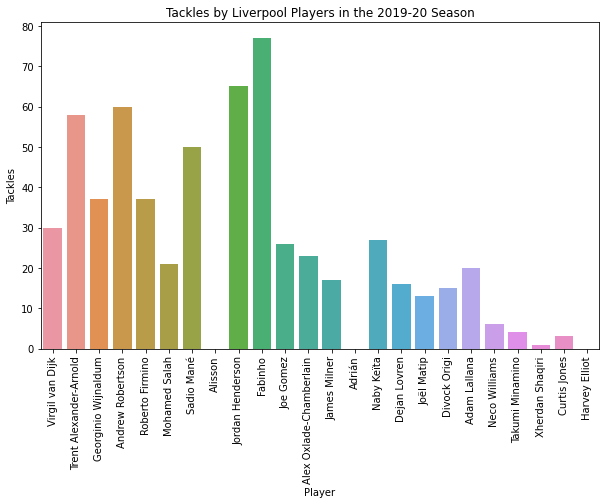

In [6]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Player', y='Tkl', data=defencive)
plt.title('Tackles by Liverpool Players in the 2019-20 Season')
plt.xlabel('Player')
plt.ylabel('Tackles')
plt.xticks(rotation=90)
plt.show()

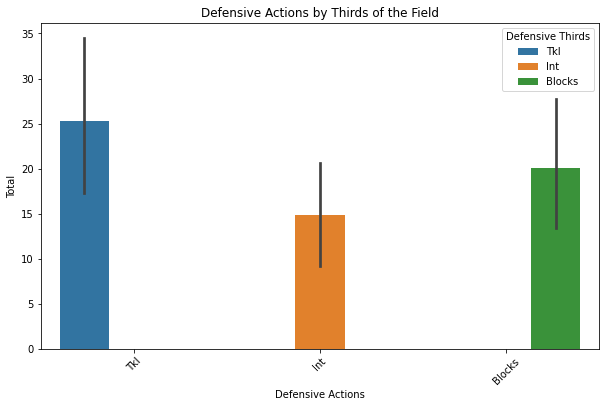

In [7]:
plt.figure(figsize=(10, 6))
defensive_thirds = ['Def 3rd', 'Mid 3rd', 'Att 3rd']
defensive_actions = ['Tkl', 'Int', 'Blocks']

df_defensive_actions = defencive[defensive_actions + defensive_thirds]
df_defensive_actions = df_defensive_actions.melt(var_name='Action', value_name='Total', id_vars=defensive_thirds)

df_defensive_actions = df_defensive_actions.rename(columns={'variable': 'Action'})

sns.barplot(x='Action', y='Total', hue='Action', data=df_defensive_actions)
plt.title('Defensive Actions by Thirds of the Field')
plt.xlabel('Defensive Actions')
plt.ylabel('Total')
plt.legend(title='Defensive Thirds')
plt.xticks(rotation=45)
plt.show()

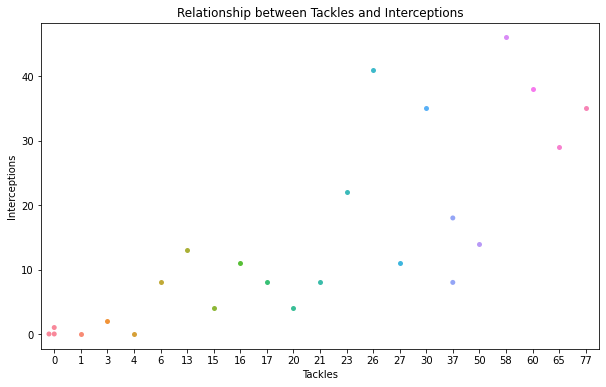

In [8]:
plt.figure(figsize=(10, 6))
sns.swarmplot(x='Tkl', y='Int', data=defencive)
plt.title('Relationship between Tackles and Interceptions')
plt.xlabel('Tackles')
plt.ylabel('Interceptions')
plt.show()

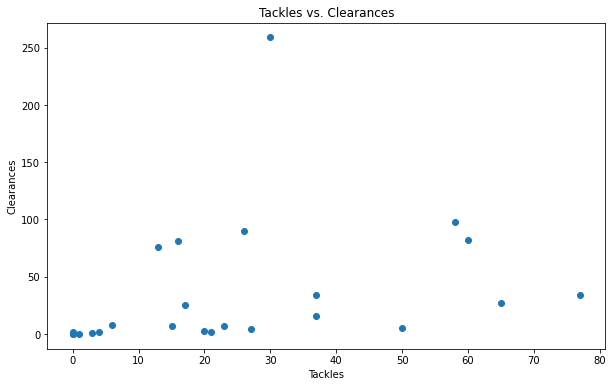

In [9]:
plt.figure(figsize=(10, 6))
plt.scatter(defencive['Tkl'], defencive['Clr'])
plt.title('Tackles vs. Clearances')
plt.xlabel('Tackles')
plt.ylabel('Clearances')
plt.show()

# Passing

In [10]:
passing.head()

,Player,Nation,Age,90s,Cmp,Att,Cmp%,TotDist,PrgDist,Cmp.1,...,Cmp%.2,Cmp.3,Att.3,Cmp%.3,Ast,KP,01-Mar,PPA,CrsPA,Prog
0,Virgil van Dijk,NED,28,38.0,2791,3085,90.5,65378,18436,14,...,94.3,1041,1223,85.1,1,7,228,9,0,156
1,Trent Alexander-Arnold,ENG,20,35.3,2254,3147,71.6,49809,19995,33,...,85.6,663,1206,55.0,13,85,202,90,30,459
2,Georginio Wijnaldum,NED,28,32.6,1477,1628,90.7,25473,4631,24,...,93.3,222,254,87.4,0,18,130,24,0,103
3,Andrew Robertson,SCO,25,34.6,2370,2928,80.9,43579,14588,24,...,88.3,440,693,63.5,12,61,175,65,27,335
4,Roberto Firmino,BRA,27,33.2,931,1171,79.5,14337,3583,42,...,83.1,124,149,83.2,8,49,70,35,0,102


In [11]:
passing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 24 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Player   24 non-null     object 
 1   Nation   24 non-null     object 
 2   Age      24 non-null     int64  
 3   90s      24 non-null     float64
 4   Cmp      24 non-null     int64  
 5   Att      24 non-null     int64  
 6   Cmp%     24 non-null     float64
 7   TotDist  24 non-null     int64  
 8   PrgDist  24 non-null     int64  
 9   Cmp.1    24 non-null     int64  
 10  Att.1    24 non-null     int64  
 11  Cmp%.1   23 non-null     float64
 12  Cmp.2    24 non-null     int64  
 13  Att.2    24 non-null     int64  
 14  Cmp%.2   24 non-null     float64
 15  Cmp.3    24 non-null     int64  
 16  Att.3    24 non-null     int64  
 17  Cmp%.3   24 non-null     float64
 18  Ast      24 non-null     int64  
 19  KP       24 non-null     int64  
 20  01-Mar   24 non-null     int64  
 21  PPA      24 non-nu

In [12]:
passing.columns

Index(['Player', 'Nation', 'Age', '90s', 'Cmp', 'Att', 'Cmp%', 'TotDist',
       'PrgDist', 'Cmp.1', 'Att.1', 'Cmp%.1', 'Cmp.2', 'Att.2', 'Cmp%.2',
       'Cmp.3', 'Att.3', 'Cmp%.3', 'Ast', 'KP', '01-Mar', 'PPA', 'CrsPA',
       'Prog'],
      dtype='object')

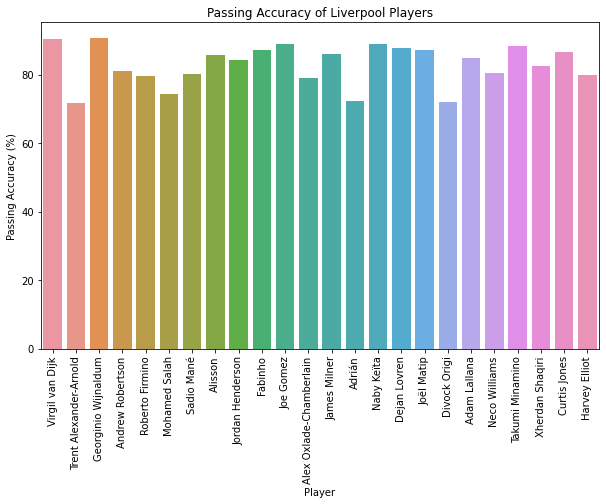

In [13]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Player', y='Cmp%', data=passing)
plt.title('Passing Accuracy of Liverpool Players')
plt.xlabel('Player')
plt.ylabel('Passing Accuracy (%)')
plt.xticks(rotation=90)
plt.show()

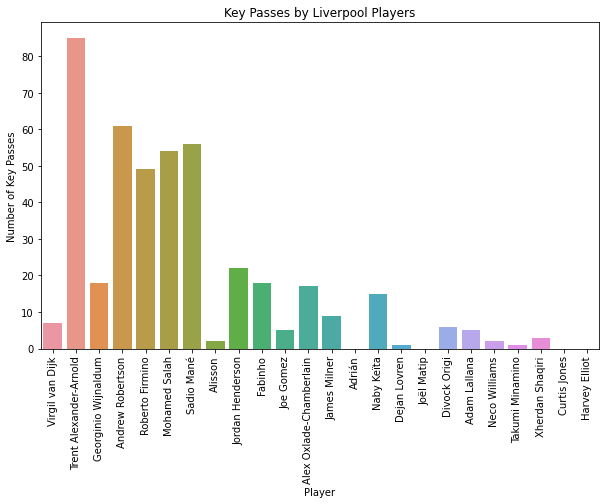

In [14]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Player', y='KP', data=passing)
plt.title('Key Passes by Liverpool Players')
plt.xlabel('Player')
plt.ylabel('Number of Key Passes')
plt.xticks(rotation=90)
plt.show()

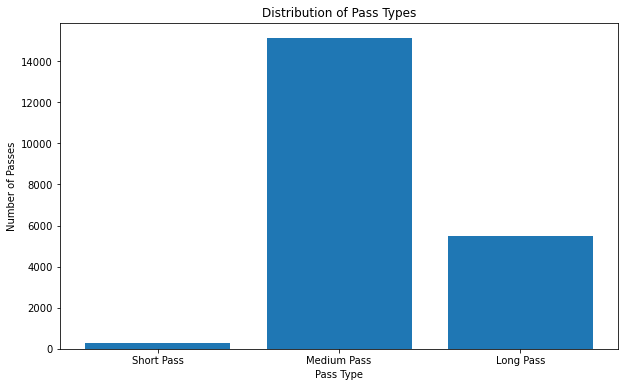

In [15]:
pass_types = ['Cmp.1', 'Cmp.2', 'Cmp.3']
pass_type_labels = ['Short Pass', 'Medium Pass', 'Long Pass']

pass_type_data = passing[pass_types].sum()

plt.figure(figsize=(10, 6))
plt.bar(pass_type_labels, pass_type_data)
plt.title('Distribution of Pass Types')
plt.xlabel('Pass Type')
plt.ylabel('Number of Passes')
plt.show()

# Goal and shot Creation

In [16]:
goal_and_shot_creation.columns

Index(['Player', 'Nation', 'Age', '90s', 'SCA', 'SCA90', 'PassLive',
       'PassDead', 'Drib', 'Sh', 'Fld', 'GCA', 'GCA90', 'PassLive.1',
       'PassDead.1', 'Drib.1', 'Sh.1', 'Fld.1', 'OG', 'Left', 'Right', 'Head',
       'TI', 'Other', 'Cmp', 'Off', 'Out', 'Int', 'Blocks'],
      dtype='object')

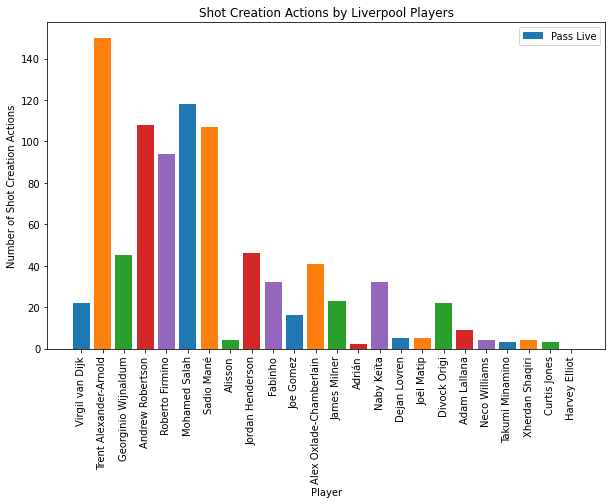

In [17]:
shot_creation_actions = ['PassLive', 'PassDead', 'Drib', 'Sh', 'Fld']
action_labels = ['Pass Live', 'Pass Dead', 'Dribble', 'Shot', 'Field']

plt.figure(figsize=(10, 6))
plt.bar(goal_and_shot_creation['Player'], goal_and_shot_creation[shot_creation_actions].sum(axis=1), color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])
plt.title('Shot Creation Actions by Liverpool Players')
plt.xlabel('Player')
plt.ylabel('Number of Shot Creation Actions')
plt.xticks(rotation=90)
plt.legend(action_labels)
plt.show()

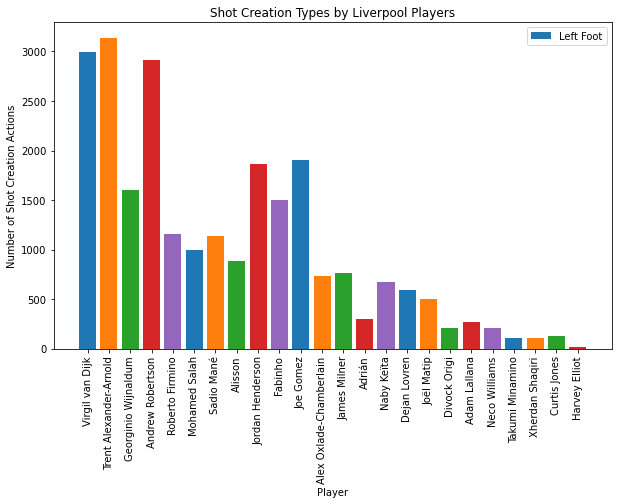

In [18]:
shot_creation_types = ['Left', 'Right', 'Head', 'TI', 'Other']
type_labels = ['Left Foot', 'Right Foot', 'Head', 'Throw-in', 'Other']

plt.figure(figsize=(10, 6))
plt.bar(goal_and_shot_creation['Player'], goal_and_shot_creation[shot_creation_types].sum(axis=1), color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])
plt.title('Shot Creation Types by Liverpool Players')
plt.xlabel('Player')
plt.ylabel('Number of Shot Creation Actions')
plt.xticks(rotation=90)
plt.legend(type_labels)
plt.show()

# Pass Type

In [19]:
pass_type.columns

Index(['Player', 'Nation', 'Age', '90s', 'Att', 'Live', 'Dead', 'FK', 'TB',
       'Press', 'Sw', 'Crs', 'CK', 'In', 'Out', 'Str', 'Ground', 'Low', 'High',
       'Left', 'Right', 'Head', 'TI', 'Other', 'Cmp', 'Off', 'Out.1', 'Int',
       'Blocks'],
      dtype='object')

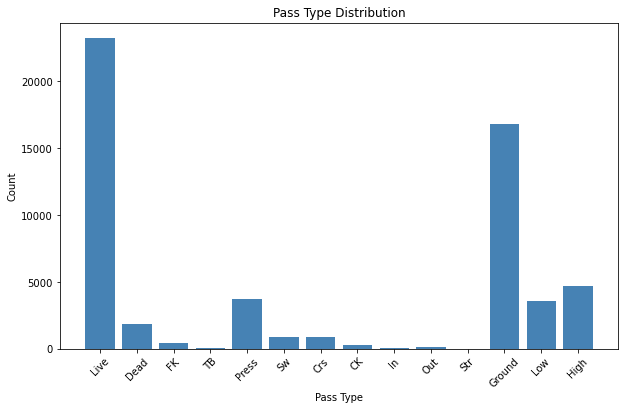

In [20]:
import matplotlib.pyplot as plt

def create_pass_type_bar_chart(data):
    # Extract pass type data
    pass_types = ['Live', 'Dead', 'FK', 'TB', 'Press', 'Sw', 'Crs', 'CK', 'In', 'Out', 'Str', 'Ground', 'Low', 'High']
    pass_type_counts = [data[pass_type].sum() for pass_type in pass_types]

    # Create the bar chart
    plt.figure(figsize=(10, 6))
    plt.bar(pass_types, pass_type_counts, color='steelblue')

    # Add labels and title
    plt.xlabel('Pass Type')
    plt.ylabel('Count')
    plt.title('Pass Type Distribution')

    # Rotate x-axis labels for better visibility
    plt.xticks(rotation=45)

    # Display the bar chart
    plt.show()

# Call the function to create the pass type bar chart
create_pass_type_bar_chart(pass_type)

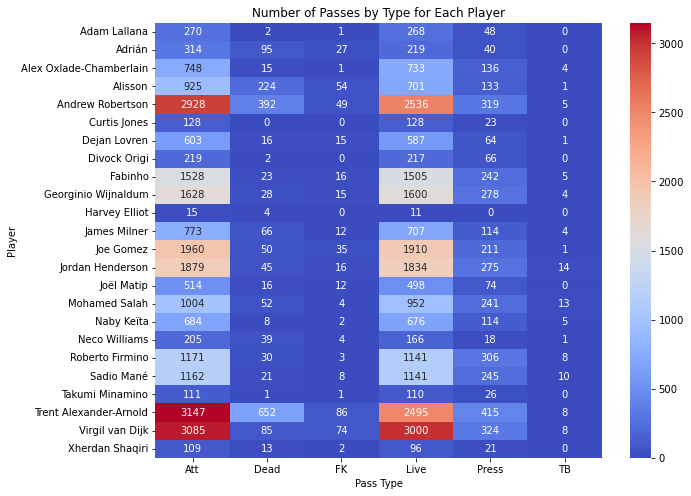

In [21]:
# Pivot data to get number of passes of each type for each player
pass_counts = pass_type.pivot_table(index='Player', values=['Att', 'Live', 'Dead', 'FK', 'TB', 'Press'], aggfunc=sum)

# Create heat map
plt.figure(figsize=(10, 8))
sns.heatmap(pass_counts, cmap='coolwarm', annot=True, fmt='g')
plt.title('Number of Passes by Type for Each Player')
plt.xlabel('Pass Type')
plt.ylabel('Player')

plt.show()

# Goal Keeping

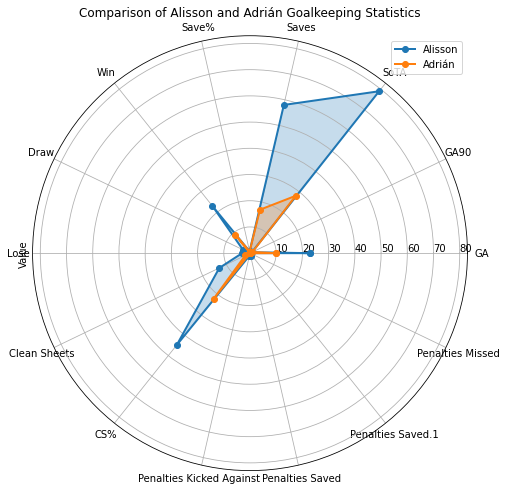

In [22]:
# Filter the data for Alisson and Adrian
alisson = goal_keeping.loc[goal_keeping['Player'] == 'Alisson']
adrian = goal_keeping.loc[goal_keeping['Player'] == 'Adrián']

# Set the data for the graph
stats = ['GA', 'GA90', 'SoTA', 'Saves', 'Save%', 'Win', 'Draw', 'Lose', 'Clean Sheets', 'CS%', 'Penalties Kicked Against', 'Penalties Saved', 'Penalties Saved.1', 'Penalties Missed']
alisson_stats = alisson[stats].values.tolist()[0]
adrian_stats = adrian[stats].values.tolist()[0]

# Set the labels
labels = np.array(stats)

# Set the angles for the radar graph
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False)

# Close the radar graph by repeating the first angle
angles = np.concatenate((angles, [angles[0]]))

# Set the data for Alisson and Adrian
alisson_data = np.array(alisson_stats + [alisson_stats[0]])
adrian_data = np.array(adrian_stats + [adrian_stats[0]])

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Plot the radar graph for Alisson and Adrian
ax.plot(angles, alisson_data, 'o-', linewidth=2, label='Alisson')
ax.fill(angles, alisson_data, alpha=0.25)
ax.plot(angles, adrian_data, 'o-', linewidth=2, label='Adrián')
ax.fill(angles, adrian_data, alpha=0.25)

# Set the title and legend
ax.set_title('Comparison of Alisson and Adrián Goalkeeping Statistics')
ax.legend()

# Set the x-axis ticks and labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, rotation=45)

# Set the y-axis label
ax.set_rlabel_position(0)
ax.set_ylabel('Value')

# Show the plot
plt.show()

# Playing Time

In [23]:
playing_time.columns

Index(['Player', 'Nation', 'Age', 'MP', 'Min', 'Mn/MP', 'Min%', '90s',
       'Starts', 'Mn/Start', 'Subs', 'Mn/Sub', 'unSub', 'PPM', 'onG', 'onGA',
       '+/-', '+/-90', 'On-Off'],
      dtype='object')

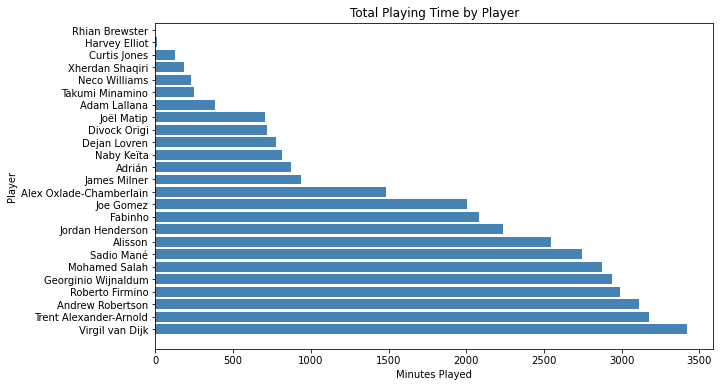

In [24]:
import matplotlib.pyplot as plt

def create_playing_time_bar_chart(data):
    # Sort the data by total minutes played in descending order
    sorted_data = data.sort_values('Min', ascending=False)

    # Extract player names and minutes played
    players = sorted_data['Player']
    minutes = sorted_data['Min']

    # Create the bar chart
    plt.figure(figsize=(10, 6))
    plt.barh(players, minutes, color='steelblue')

    # Add labels and title
    plt.xlabel('Minutes Played')
    plt.ylabel('Player')
    plt.title('Total Playing Time by Player')

    # Display the bar chart
    plt.show()

# Call the function to create the playing time bar chart
create_playing_time_bar_chart(playing_time)

# Possession

In [25]:
possession.columns

Index(['Player', 'Nation', 'Age', '90s', 'Touches', 'Def Pen', 'Def 3rd',
       'Mid 3rd', 'Att 3rd', 'Att Pen', 'Live', 'Succ', 'Att', 'Succ%', '#Pl',
       'Megs', 'Carries', 'TotDist', 'PrgDist', 'Targ', 'Rec', 'Rec%',
       'Miscon', 'Dispos'],
      dtype='object')

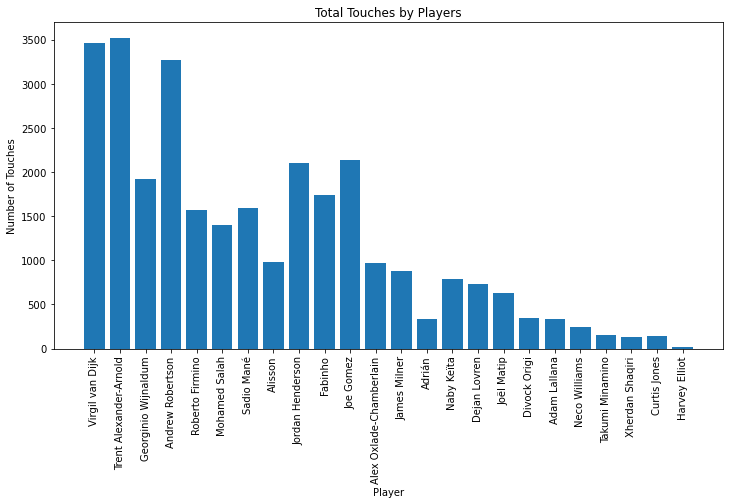

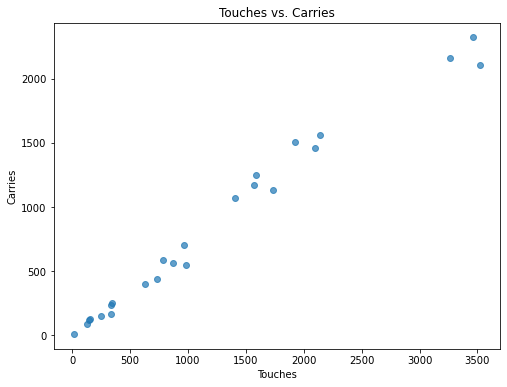

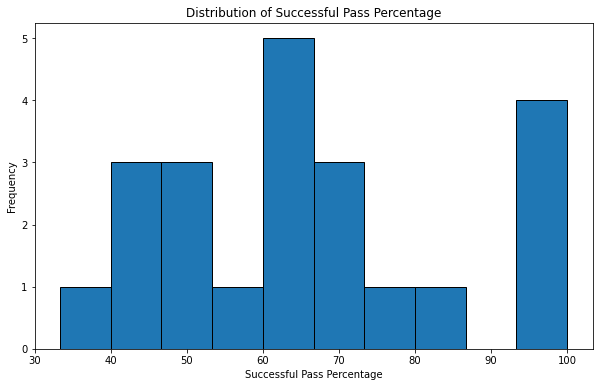

In [26]:
import matplotlib.pyplot as plt

# Bar Chart - Total Touches by Players
plt.figure(figsize=(12, 6))
plt.bar(possession['Player'], possession['Touches'])
plt.title('Total Touches by Players')
plt.xlabel('Player')
plt.ylabel('Number of Touches')
plt.xticks(rotation=90)
plt.show()

# Scatter Plot - Touches vs. Carries
plt.figure(figsize=(8, 6))
plt.scatter(possession['Touches'], possession['Carries'], alpha=0.7)
plt.title('Touches vs. Carries')
plt.xlabel('Touches')
plt.ylabel('Carries')
plt.show()

# Histogram - Distribution of Successful Pass Percentage
plt.figure(figsize=(10, 6))
plt.hist(possession['Succ%'], bins=10, edgecolor='black')
plt.title('Distribution of Successful Pass Percentage')
plt.xlabel('Successful Pass Percentage')
plt.ylabel('Frequency')
plt.show()


In [27]:
scores.columns

Index(['Date', 'Time', 'Round', 'Day', 'Venue', 'Result', 'GF', 'GA',
       'Opponent', 'Poss', 'Attendance', 'Captain', 'Referee'],
      dtype='object')

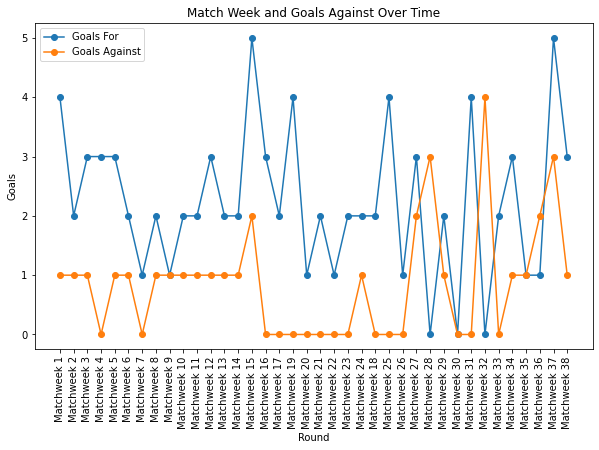

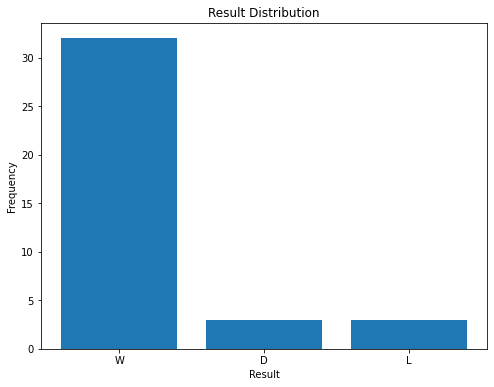

In [39]:
import matplotlib.pyplot as plt

# Line Chart - Goals For and Goals Against Over Time
plt.figure(figsize=(10, 6))
plt.plot(scores['Round'], scores['GF'], marker='o', label='Goals For')
plt.plot(scores['Round'], scores['GA'], marker='o', label='Goals Against')
plt.title('Match Week and Goals Against Over Time')
plt.xlabel('Round')
plt.ylabel('Goals')
plt.xticks(rotation=90)
plt.legend()
plt.show()

# Bar Chart - Result Distribution
result_counts = scores['Result'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(result_counts.index, result_counts.values)
plt.title('Result Distribution')
plt.xlabel('Result')
plt.ylabel('Frequency')
plt.show()


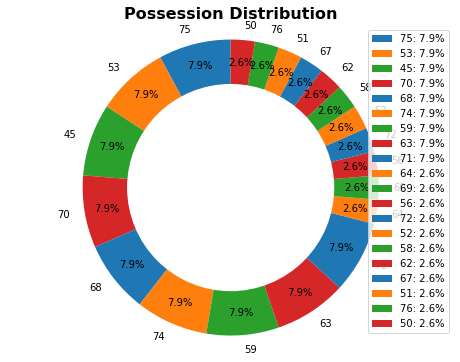

In [29]:
# Pie Chart - Possession Distribution
possession_counts = scores['Poss'].value_counts()
labels = possession_counts.index
values = possession_counts.values

# Create a custom color palette for the pie chart
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Create the pie chart with improved details
plt.figure(figsize=(8, 6))
plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, pctdistance=0.85, wedgeprops=dict(width=0.4))
plt.title('Possession Distribution', fontsize=16, fontweight='bold')

# Draw a white circle at the center to create a donut chart effect
center_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

# Add a legend with percentage values
percentage_values = [f'{val / sum(values) * 100:.1f}%' for val in values]
legend_labels = [f'{label}: {value}' for label, value in zip(labels, percentage_values)]
plt.legend(legend_labels, loc='upper right')

# Set aspect ratio to equal for a circular pie chart
plt.axis('equal')

plt.show()


# Shooting

In [30]:
shooting.columns

Index(['Player', 'Nation', 'Pos', 'Age', '90s', 'Gls', 'Sh', 'SoT', 'SoT%',
       'Sh/90', 'SoT/90', 'G/Sh', 'G/SoT', 'FK', 'PK', 'PKatt'],
      dtype='object')

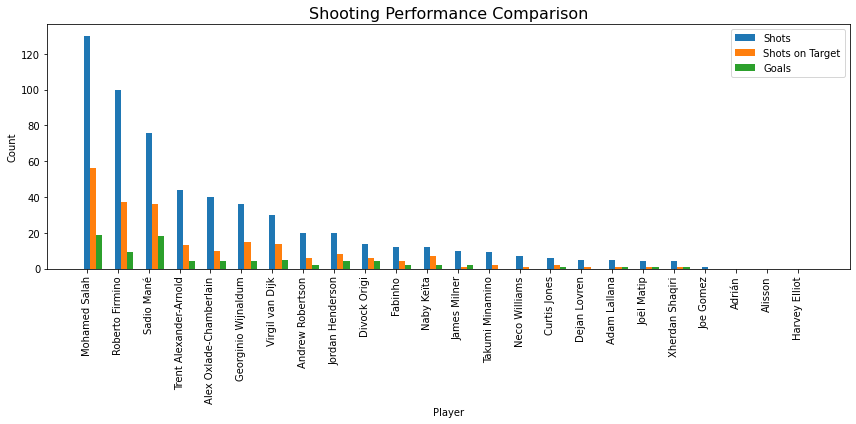

In [31]:
import numpy as np

# Select relevant columns from the shooting dataset
shooting_data = shooting[['Player', 'Sh', 'SoT', 'Gls']]

# Sort the data by the total number of Shots (Sh) in descending order
sorted_data = shooting_data.sort_values('Sh', ascending=False)

# Set the player names as the x-axis labels
players = sorted_data['Player']
x = np.arange(len(players))

# Define the metrics for comparison
metrics = ['Sh', 'SoT', 'Gls']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
labels = ['Shots', 'Shots on Target', 'Goals']

# Create the bar chart
plt.figure(figsize=(12, 6))
for i, metric in enumerate(metrics):
    plt.bar(x + (i * 0.2), sorted_data[metric], width=0.2, color=colors[i], label=labels[i])

plt.title('Shooting Performance Comparison', fontsize=16)
plt.xlabel('Player')
plt.ylabel('Count')
plt.xticks(x, players, rotation=90)
plt.legend()

plt.tight_layout()
plt.show()

# Standard

In [32]:
standard.columns

Index(['Player', 'Nation', 'Age', 'MP', 'Starts', 'Min', 'Gls', 'Ast', 'PK',
       'PKatt', 'CrdY', 'CrdR', 'Gls.1', 'Ast.1', 'G+A'],
      dtype='object')

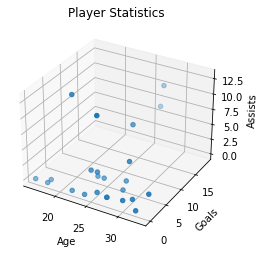

In [8]:
from mpl_toolkits.mplot3d import Axes3D

# Subset the relevant columns from the dataframe
subset = standard[['Age', 'Gls', 'Ast']]

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(subset['Age'], subset['Gls'], subset['Ast'])

# Set labels for each axis
ax.set_xlabel('Age')
ax.set_ylabel('Goals')
ax.set_zlabel('Assists')

# Set a title for the plot
ax.set_title('Player Statistics')

plt.show()

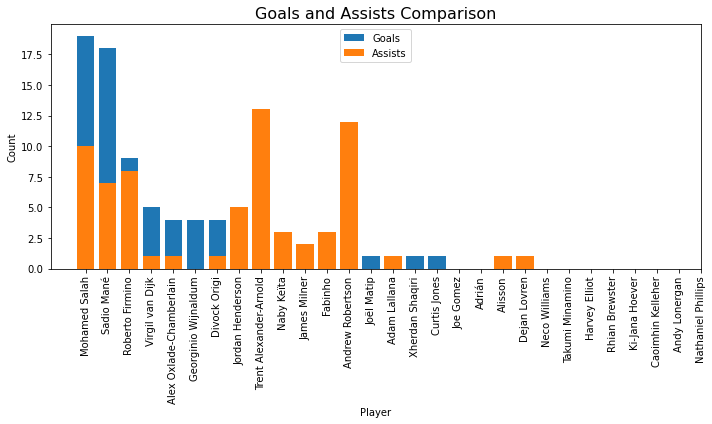

In [10]:
# Select relevant columns from the standard dataset
goals_assists_data = standard[['Player', 'Gls', 'Ast']]

# Sort the data by the total number of Goals (Gls) in descending order
sorted_data = goals_assists_data.sort_values('Gls', ascending=False)

# Set the player names as the x-axis labels
players = sorted_data['Player']
x = np.arange(len(players))

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(x, sorted_data['Gls'], color='#1f77b4', label='Goals')
plt.bar(x, sorted_data['Ast'], color='#ff7f0e', label='Assists')

plt.title('Goals and Assists Comparison', fontsize=16)
plt.xlabel('Player')
plt.ylabel('Count')
plt.xticks(x, players, rotation=90)
plt.legend()

plt.tight_layout()
plt.show()

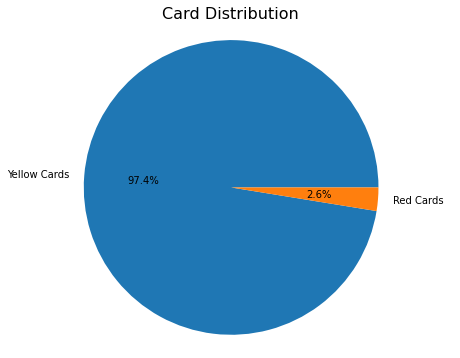

In [34]:
# Calculate the total number of yellow cards (CrdY) and red cards (CrdR)
total_yellow_cards = standard['CrdY'].sum()
total_red_cards = standard['CrdR'].sum()

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie([total_yellow_cards, total_red_cards], labels=['Yellow Cards', 'Red Cards'], autopct='%1.1f%%')
plt.title('Card Distribution', fontsize=16)
plt.axis('equal')

plt.show()

In [12]:
# Filter the dataframe to get players who received yellow cards
players_with_yellow_cards = standard.loc[standard['CrdY'] > 0, ['Player', 'CrdY']]

# Filter the dataframe to get players who received red cards
players_with_red_cards = standard.loc[standard['CrdR'] > 0, ['Player', 'CrdR']]

# Display the players and their respective card counts
print("Players with Yellow Cards:")
print(players_with_yellow_cards)

print("\nPlayers with Red Cards:")
print(players_with_red_cards)

Players with Yellow Cards:
                     Player  CrdY
0           Virgil van Dijk   1.0
1    Trent Alexander-Arnold   5.0
3          Andrew Robertson   2.0
5             Mohamed Salah   1.0
6                Sadio Mané   3.0
8          Jordan Henderson   2.0
9                   Fabinho   6.0
10                Joe Gomez   7.0
11  Alex Oxlade-Chamberlain   1.0
12             James Milner   4.0
13                   Adrián   1.0
14               Naby Keïta   1.0
15             Dejan Lovren   1.0
17             Divock Origi   1.0
18             Adam Lallana   1.0
19            Neco Williams   1.0

Players with Red Cards:
    Player  CrdR
7  Alisson   1.0


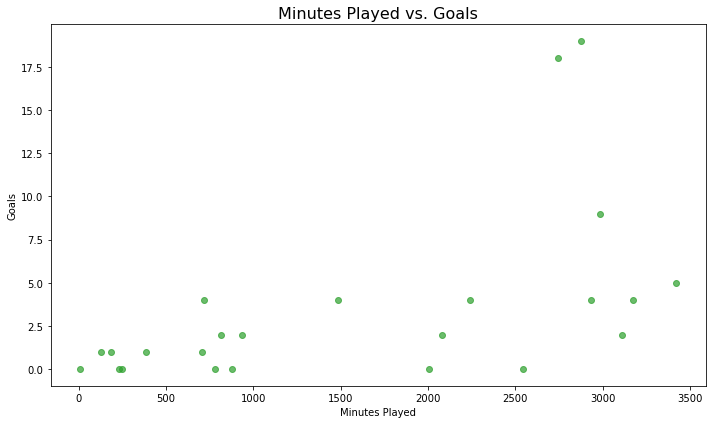

In [35]:
# Select relevant columns from the standard dataset
minutes_goals_data = standard[['Player', 'Min', 'Gls']]

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(minutes_goals_data['Min'], minutes_goals_data['Gls'], color='#2ca02c', alpha=0.7)

plt.title('Minutes Played vs. Goals', fontsize=16)
plt.xlabel('Minutes Played')
plt.ylabel('Goals')

plt.tight_layout()
plt.show()

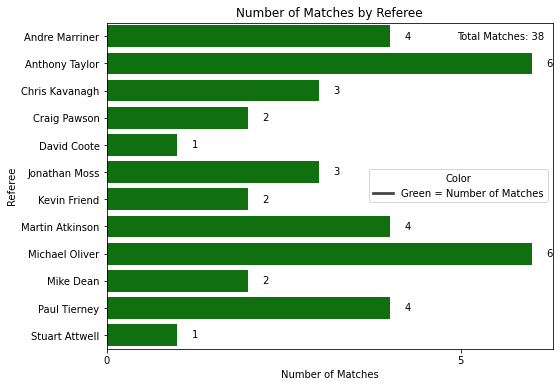

In [36]:
# Group the data by referee and count the number of matches for each referee
referees = scores.groupby('Referee').size().reset_index(name='Count')

# Create a horizontal bar chart to display the results
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x='Count', y='Referee', data=referees, color='green')

# Customize the chart title, axis labels, and tick labels
ax.set_title('Number of Matches by Referee')
ax.set_xlabel('Number of Matches')
ax.set_ylabel('Referee')
ax.set_xticks(range(0, max(referees['Count'])+1, 5))
ax.set_yticklabels(referees['Referee'], fontsize=10)

# Add data labels to the bars
for i, v in enumerate(referees['Count']):
    ax.text(v + 0.2, i + 0.1, str(v), color='black')

# Add a note to the chart with the total number of matches
total_matches = sum(referees['Count'])
ax.text(0.98, 0.95, f'Total Matches: {total_matches}', transform=ax.transAxes, ha='right', fontsize=10)

# Add a legend to explain the color scheme
ax.legend(title='Color', labels=['Green = Number of Matches'])

# Display the chart
plt.show()

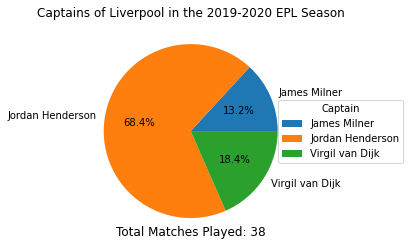

In [42]:
# Count the number of matches captained by each player
captains = scores.groupby('Captain').size().reset_index(name='Count')

# Calculate the total number of matches played
total_matches = captains['Count'].sum()

# Create a pie chart
fig, ax = plt.subplots()
ax.pie(captains['Count'], labels=captains['Captain'], autopct='%1.1f%%')

# Add a title and subtitle
ax.set_title('Captains of Liverpool in the 2019-2020 EPL Season')
ax.text(0, -1.2, f'Total Matches Played: {total_matches}', fontsize=12, ha='center')

# Add a legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='Captain', loc='center right', bbox_to_anchor=(1.5, 0.5))

plt.show()

In [46]:
# Load the dataset
data = pd.read_csv("/Users/gowthamramakrishnan/Desktop/Liverpool/Standard_stats.csv", encoding='ISO-8859-1')

# Assign weights to performance metrics
goal_weight = 0.6
assist_weight = 0.4
minutes_weight = 0.2

# Calculate player scores
data['Player Score'] = (goal_weight * data['Gls']) + (assist_weight * data['Ast']) + (minutes_weight * data['Min'])

# Sort the players based on scores in descending order
sorted_data = data.sort_values('Player Score', ascending=False)

# Select the top players as the best overall players
top_players = sorted_data.head(5)  # Change the number to select a different number of players

# Display the best overall players
print("Best Overall Players:")
print(top_players[['Player', 'Gls', 'Ast', 'Min', 'Player Score']])

Best Overall Players:
                   Player   Gls   Ast     Min  Player Score
0         Virgil van Dijk   5.0   1.0  3420.0         687.4
1  Trent Alexander-Arnold   4.0  13.0  3175.0         642.6
3        Andrew Robertson   2.0  12.0  3111.0         628.2
4         Roberto Firmino   9.0   8.0  2988.0         606.2
5           Mohamed Salah  19.0  10.0  2876.0         590.6


In [51]:
# Define the criteria for young player
age_threshold = 23
minutes_threshold = 500

# Filter the data for players below the age threshold and with a minimum number of minutes played
young_players = data[(data['Age'] <= age_threshold) & (data['Min'] >= minutes_threshold)]

# Calculate the young player scores based on goals and assists
young_players['Young Player Score'] = young_players['Gls'] + young_players['Ast']

# Sort the young players based on scores in descending order
sorted_young_players = young_players.sort_values('Young Player Score', ascending=False)

# Select the top young player
young_player = sorted_young_players.head(1)

# Display the young player of the season
print("Young Player of the Season:")
print(young_player[['Player', 'Age', 'Gls', 'Ast', 'Min', 'Young Player Score']])

Young Player of the Season:
                   Player  Age  Gls   Ast     Min  Young Player Score
1  Trent Alexander-Arnold   20  4.0  13.0  3175.0                17.0


/var/folders/96/qqlkbqys6kqb27dyfw97gdz40000gp/T/ipykernel_33079/719507969.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  young_players['Young Player Score'] = young_players['Gls'] + young_players['Ast']


In [49]:
# Sort the data based on goals in descending order
top_scorers = data.sort_values('Gls', ascending=False)

# Select the top goal scorers
top_goal_scorers = top_scorers.head(3)  # Adjust the number to select desired number of top goal scorers

# Display the top goal scorers
print("Top Goal Scorers:")
print(top_goal_scorers[['Player', 'Gls']])


Top Goal Scorers:
            Player   Gls
5    Mohamed Salah  19.0
6       Sadio Mané  18.0
4  Roberto Firmino   9.0
